In [94]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### 1- loading data

In [175]:
titanic = pd.read_csv('train.csv')
titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


### 2- EDA

<Axes: >

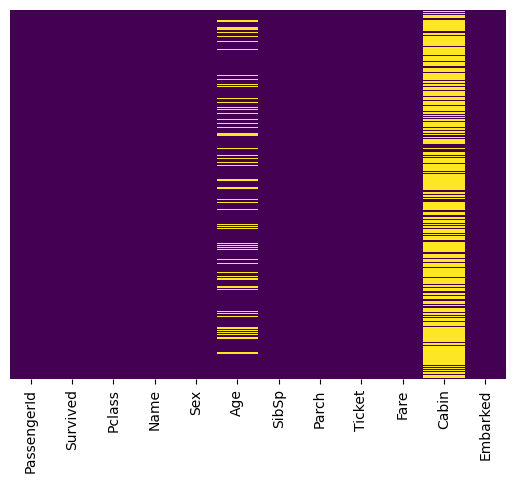

In [21]:
sns.heatmap(titanic.isnull(),yticklabels = False, cbar = False, cmap = 'viridis')

In [25]:
sns.set_style('whitegrid')

<Axes: xlabel='Survived', ylabel='count'>

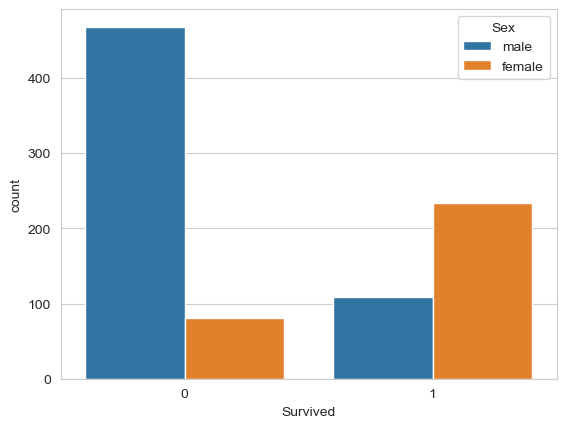

In [31]:
sns.countplot(x = 'Survived',hue = 'Sex', data = titanic) # survived in terms of gender

<Axes: xlabel='Survived', ylabel='count'>

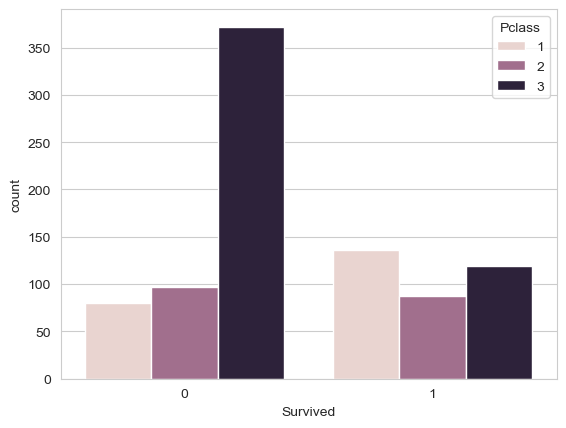

In [33]:
sns.countplot(x = 'Survived', hue = 'Pclass', data = titanic)

<Axes: xlabel='Survived', ylabel='count'>

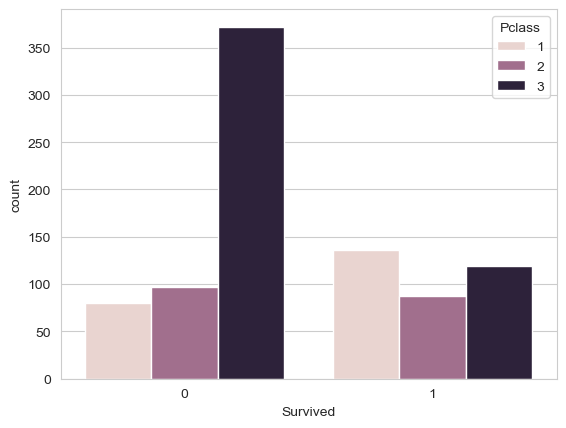

In [39]:
sns.countplot(x = 'Survived', hue = 'Pclass', data = titanic)

<Axes: xlabel='Age', ylabel='Count'>

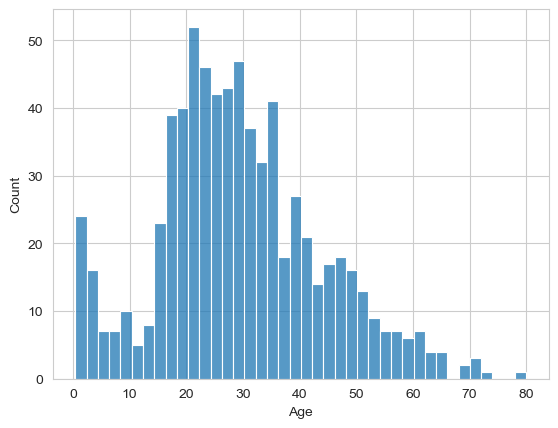

In [55]:
sns.histplot(x = 'Age', data = titanic, bins = 40)

<Axes: ylabel='Frequency'>

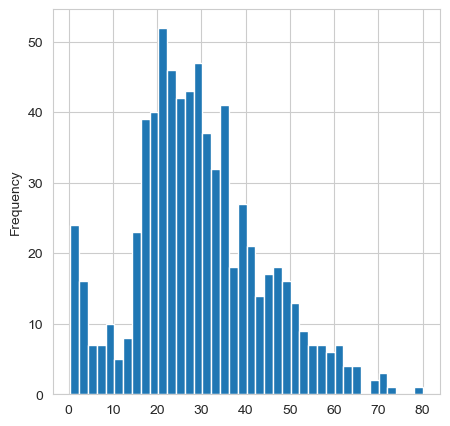

In [61]:
titanic['Age'].plot.hist(bins = 40, figsize = (5,5))

<Axes: xlabel='SibSp', ylabel='count'>

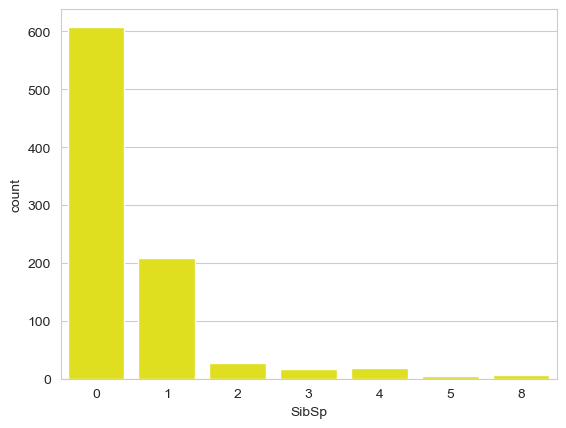

In [65]:
sns.countplot(x = 'SibSp', data = titanic, color = 'Yellow')

<Axes: >

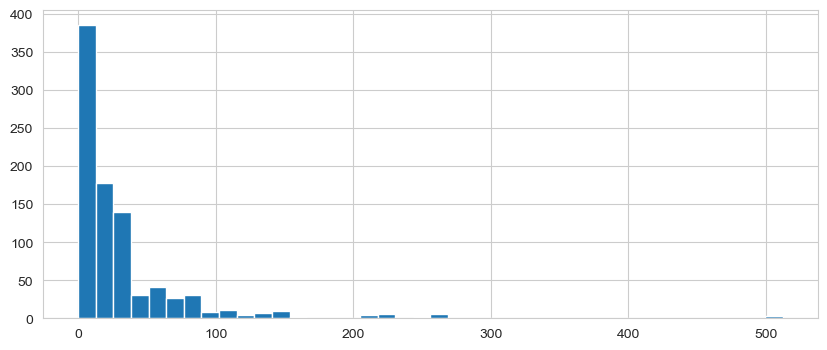

In [69]:
titanic['Fare'].hist(bins = 40, figsize = (10,4))

In [75]:
!pip install cufflinks

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached fqdn-1.5.1-py3-none-any.whl.metadata (1.4 kB)
  Using cached isoduration-20.11.0-py3-none-any.whl.metadata (5.7 kB)
  Using cached uri_template-1.3.0-py3-none-any.whl.metadata (8.8 kB)
  Using cached webcolors-24.11.1-py3-none-any.whl.metadata (2.2 kB)
Using cached webcolors-24.11.1-py3-none-any.whl (14 kB)
Using cached fqdn-1.5.1-py3-none-any.whl (9.1 kB)
Using cached isoduration-20.11.0-py3-none-any.whl (11 kB)
Using cached uri_template-1.3.0-py3-none-any.whl (11 kB)
  Created wheel for cufflinks: filename=cufflinks-0.17.3-py3-none-any.whl size=68721 sha256=9dcbd7a74054991bdffa916b5bdfdd6dcfc59539baf390f07a398b2338c85a13
  Stored in directory: c:\users\kami5\appdata\local\pip\cache\wheels\c0\d9\70\372130dacf508192607c1a7359c7bf0656b1a3b79f6cf66f7a
Successfully built cufflinks


In [77]:
import cufflinks as cf

In [79]:
cf.go_offline()

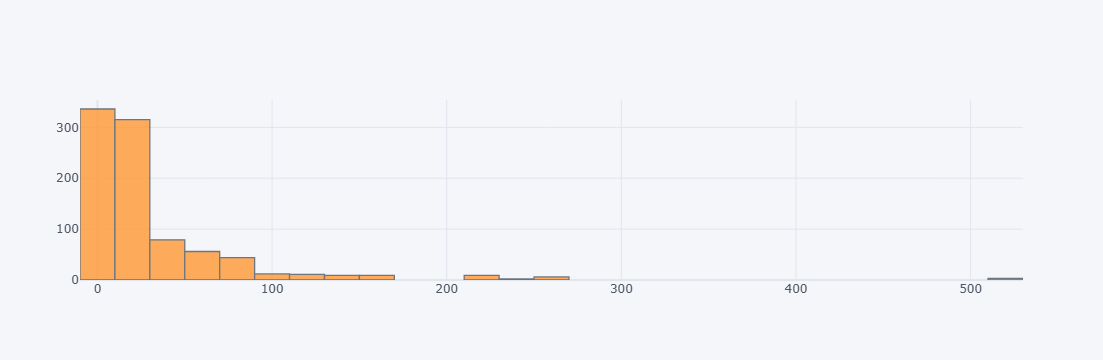

In [83]:
titanic['Fare'].iplot(kind = 'hist', bins = 50)

<Axes: xlabel='Pclass', ylabel='Age'>

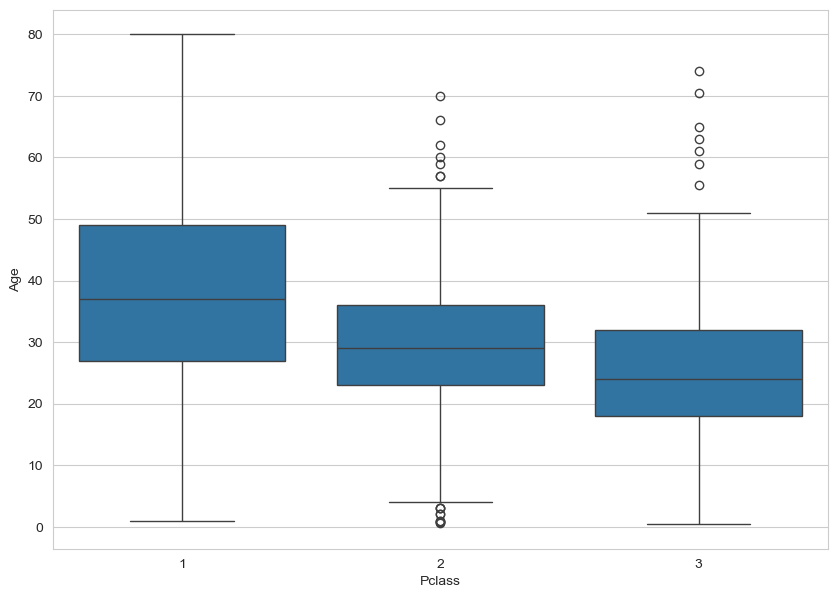

In [96]:
plt.figure(figsize = (10,7))
sns.boxplot(x = 'Pclass', y = 'Age', data = titanic)

### 3- Cleaning Data

In [99]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]

    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [177]:
titanic['Age'] = titanic[['Age','Pclass']].apply(impute_age, axis = 1)

C:\Users\kami5\AppData\Local\Temp\ipykernel_4852\1334420608.py:2: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\kami5\AppData\Local\Temp\ipykernel_4852\1334420608.py:3: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



<Axes: >

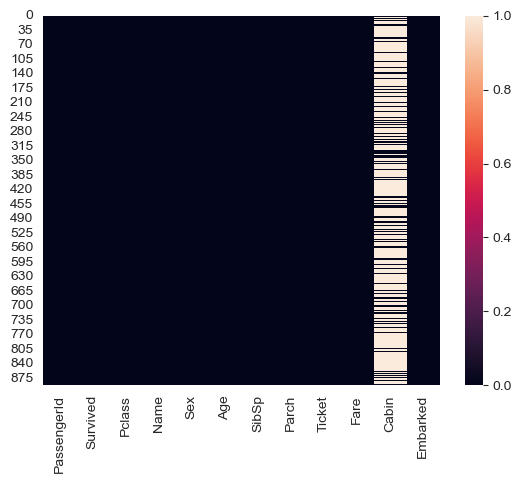

In [179]:
sns.heatmap(titanic.isnull())

In [181]:
titanic.drop('Cabin',axis = 1, inplace = True) # dropping cabin as it is almost null

In [183]:
titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.45,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,Q


In [185]:
sex = pd.get_dummies(titanic['Sex'], drop_first = True) # giving categorical values

In [187]:
sex

,male
0,True
1,False
2,False
3,False
4,True
...,...
886,True
887,False
888,False
889,True


In [189]:
embark = pd.get_dummies(titanic['Embarked'], drop_first = True)

In [191]:
embark

,Q,S
0,False,True
1,False,False
2,False,True
3,False,True
4,False,True
...,...,...
886,False,True
887,False,True
888,False,True
889,False,False


In [193]:
titanic = pd.concat([titanic, sex, embark], axis = 1)

In [197]:
titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,S,True,False,True
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,S,False,False,True
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.45,S,False,False,True
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C,True,False,False
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,Q,True,True,False


In [149]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1.0,0.0,3.0,"Braund, Mr. Owen Harris",male,22.0,1.0,0.0,A/5 21171,7.2500,S,True,False,True
1,2.0,1.0,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0.0,PC 17599,71.2833,C,False,False,False
2,3.0,1.0,3.0,"Heikkinen, Miss. Laina",female,26.0,0.0,0.0,STON/O2. 3101282,7.9250,S,False,False,True
3,4.0,1.0,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1000,S,False,False,True
4,5.0,0.0,3.0,"Allen, Mr. William Henry",male,35.0,0.0,0.0,373450,8.0500,S,True,False,True


In [199]:
titanic['male'] = titanic['male'].astype(int) # changing to integers so it can be processes

In [201]:
titanic[['Q','S']] = titanic[['Q','S']].astype(int)

In [205]:
titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,S,1,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,S,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.45,S,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C,1,0,0
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,Q,1,1,0


In [207]:
titanic.drop(['PassengerId','Name','Sex','Ticket'],axis = 1, inplace = True) #removing columns which are not for processing

In [211]:
titanic.drop('Embarked', axis = 1, inplace = True)

In [213]:
titanic.tail()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
886,0,2,27.0,0,0,13.00,1,0,1
887,1,1,19.0,0,0,30.00,0,0,1
888,0,3,24.0,1,2,23.45,0,0,1
889,1,1,26.0,0,0,30.00,1,0,0
890,0,3,32.0,0,0,7.75,1,1,0


### 4- Model Training

In [220]:
x = titanic.drop('Survived', axis = 1) # all input features
y = titanic['Survived'] # output column

In [226]:
from sklearn.model_selection import train_test_split

In [228]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3,random_state = 42)

In [232]:
from sklearn.linear_model import LogisticRegression

In [234]:
logisticR = LogisticRegression()

In [236]:
logisticR.fit(x_train,y_train)

C:\Users\kami5\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [238]:
predictions = logisticR.predict(x_test)

In [240]:
predictions

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0], dtype=int64)

In [260]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

Accuracy is:  80.97
              precision    recall  f1-score   support

           0       0.82      0.87      0.84       157
           1       0.79      0.73      0.76       111

    accuracy                           0.81       268
   macro avg       0.81      0.80      0.80       268
weighted avg       0.81      0.81      0.81       268



<Axes: >

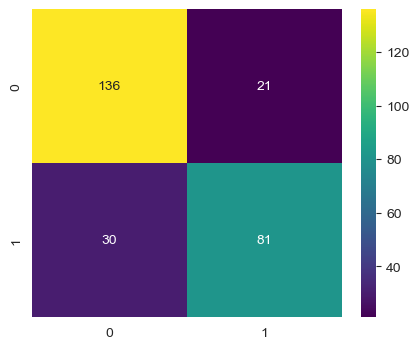

In [272]:
accuracy = round(accuracy_score(y_test, predictions) * 100,2)
print('Accuracy is: ',accuracy)
print(classification_report(y_test, predictions))
plt.figure(figsize = (5,4))
sns.heatmap(confusion_matrix(y_test,predictions), annot = True, fmt = '',cmap = 'viridis')

<Axes: xlabel='Survived', ylabel='Count'>

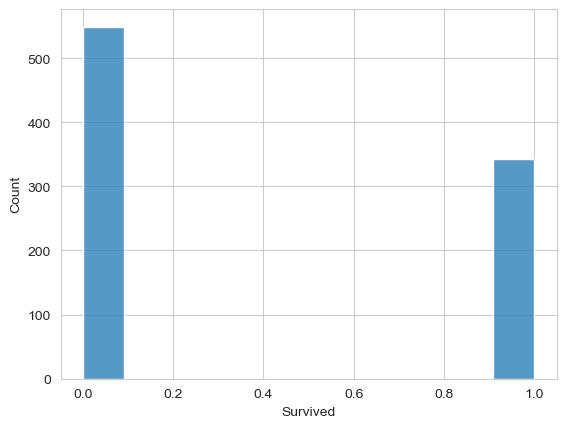

In [252]:
sns.histplot(y) # here we can see that out model is overfit 

In [276]:
from imblearn.over_sampling import SMOTE

In [278]:
sm = SMOTE(random_state = 42)
x,y = sm.fit_resample(x,y)

<Axes: xlabel='Survived', ylabel='Count'>

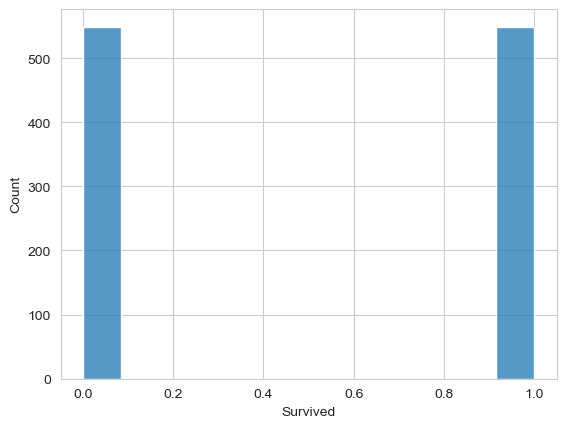

In [280]:
sns.histplot(y)

In [282]:
#Again training on balanced classification
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3,random_state = 42)

In [284]:
logisticR = LogisticRegression()

In [286]:
logisticR.fit(x_train,y_train)

C:\Users\kami5\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [288]:
predictions = logisticR.predict(x_test)

Accuracy is:  82.42
              precision    recall  f1-score   support

           0       0.83      0.81      0.82       165
           1       0.82      0.84      0.83       165

    accuracy                           0.82       330
   macro avg       0.82      0.82      0.82       330
weighted avg       0.82      0.82      0.82       330



<Axes: >

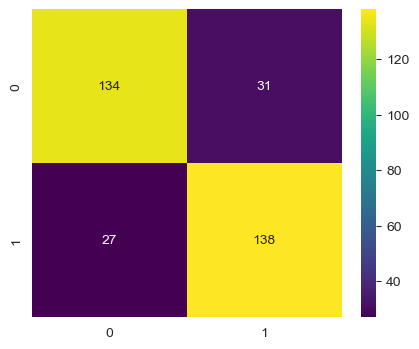

In [290]:
accuracy = round(accuracy_score(y_test, predictions) * 100,2)
print('Accuracy is: ',accuracy)
print(classification_report(y_test, predictions))
plt.figure(figsize = (5,4))
sns.heatmap(confusion_matrix(y_test,predictions), annot = True, fmt = '',cmap = 'viridis')

In [292]:
import pickle

In [298]:
with open('titanic.pkl','wb') as file:
    pickle.dump(logisticR,file)

In [300]:
x.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q', 'S'], dtype='object')